In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import turicreate as tc

# Model Type - 1

In [2]:
df = pd.read_csv('dataset2.csv')

In [13]:
popular_products = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B0043OYFKU,227
B00639DLV2,215
B000ZMBSPE,209
B000142FVW,196
B009FKNGRA,191
B00150LT40,186
B00AE0790U,185
B009FKNGGQ,184
B003V265QW,182


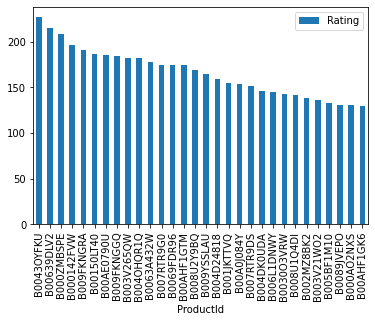

In [14]:
most_popular.head(30).plot(kind = "bar")

# Analysis:
The above graph gives us the most popular products (arranged in descending order) sold by the business.

For eaxmple, product, ID # B0043OYFKU has best sales , the next most popular product, ID # B00639DLV2 has second best sales, etc.

# Model System Type - 2

# Model-based collaborative filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.

A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [15]:
ratings_utility_matrix = df.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,1304351475,535795531X,5357955948,6022600790,7806397051,9746427962,9759091062,9788071198,9788071597,9788072208,...,B00L3LB0IG,B00L3LBUGI,B00L5BXG36,B00L5JHZJO,B00L5KTZ0K,B00L7BX4FE,B00LAOMUUS,B00LG63DOM,B00LLPT4HI,B00LNOKBYW
UserId,,,,,,,,,,,,,,,,,,,,,
A00473363TJ8YSZ3YAGG9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A00700212KB3K0MVESPIY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0078719IR14X3NNUG0F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A02155413BVL8D0G7X6DN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A029527620Q3SK5XW16RR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Transposing the matrix
X = ratings_utility_matrix.T
X.head()


UserId,A00473363TJ8YSZ3YAGG9,A00700212KB3K0MVESPIY,A0078719IR14X3NNUG0F,A02155413BVL8D0G7X6DN,A029527620Q3SK5XW16RR,A03236882LUP4ARMDDMXU,A03364251DGXSGA9PSR99,A04371222UWPCRS81JO2Z,A059547920Q3LZVFHLPI3,A0908131Z7BWYSMRQ16T,...,AZTYMMD36CXY2,AZTZ7SIIRXLXE,AZUH2MX87LX7J,AZW9UD7Z7J0WL,AZWJAXOQMB8EK,AZX1JTTIUYZX4,AZXP46IB63PU8,AZYA6NBTF2843,AZZ5ASC403N74,AZZT1ERHBSNQ8
ProductId,,,,,,,,,,,,,,,,,,,,,
1304351475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535795531X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5357955948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6022600790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7806397051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(29127, 10)

In [18]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(29127, 29127)

In [19]:
X.index[99]

'B000052YMT'

In [20]:
i = "B000052YMT"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [21]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(29127,)

In [22]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
# Recommend.remove(i)

Recommend[0:9]

['535795531X',
 '5357955948',
 '7806397051',
 '9746427962',
 '9759091062',
 '9788071198',
 '9788072216',
 '9788073476',
 '9788073840']

# Model Type - 3

Cosine Similarity: sim(i,j) = cos(i,j) = i.j/(i^2 * j^2)


Collaborative filtering use similarities of the 'user' and 'item' fields, with values of 'rating' predicted based on either user-item, or item-item similarity:
 - Item-Item CF: "Users who liked this item also liked..."
 - User-Item CF: "Users who are similar to you also liked..."
 
In both cases, we need to create a user-item matrix built from the entire dataset. We'll create a matrix for each of the training and testing sets, with the users as the rows, the books as the columns, and the rating as the matrix value. Note that this will be a very sparse matrix, as not every user will have watched every movie etc.

We'll first create a new dataframe that contains only the relevant columns (```ProductId```, ```Rating```, and ```Zip Code```).

In [24]:
df[1030:1040]

,Unnamed: 0,UserId,ProductId,Rating,Timestamp,gender,zip_code,age
1030,1030,AYF242R6GQMUP,B0000530LV,3.0,1292025600,F,27302,18
1031,1031,A3S2PBWW715JOG,B0000530M0,4.0,1361145600,F,27272,27
1032,1032,A1Z54EM24Y40LL,B0000530M0,1.0,1113523200,M,27321,40
1033,1033,A2UOHALGF2X77Q,B0000530M0,4.0,1325203200,F,27333,24
1034,1034,A2HYMOXLZZIZ3H,B0000530M0,3.0,1333756800,F,27288,38
1035,1035,ATN552TF5V40Z,B0000530M0,3.0,1300147200,F,27236,20
1036,1036,A2C58G8O40YC7T,B0000530M0,3.0,1313798400,F,27305,31
1037,1037,A3S3R88HA0HZG3,B0000530M0,5.0,1247184000,M,27296,39
1038,1038,AH9I27OGYUNS8,B0000530NA,5.0,1382918400,F,27266,36
1039,1039,AUFB3GQJV10P0,B0000530NA,5.0,1300060800,M,27255,24


In [25]:
user_item_rating = df[['ProductId', 'zip_code','Rating']]
user_item_rating.head()

,ProductId,zip_code,Rating
0,1304351475,27261,5.0
1,535795531X,27281,3.0
2,5357955948,27334,5.0
3,6022600790,27314,4.0
4,7806397051,27299,4.0


In [97]:
user_item_rating['Rating'] = user_item_rating.Rating.astype(int)
user_item_rating.head()

/home/saksham/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ProductId,zip_code,Rating
0,1304351475,27261,5
1,535795531X,27281,3
2,5357955948,27334,5
3,6022600790,27314,4
4,7806397051,27299,4


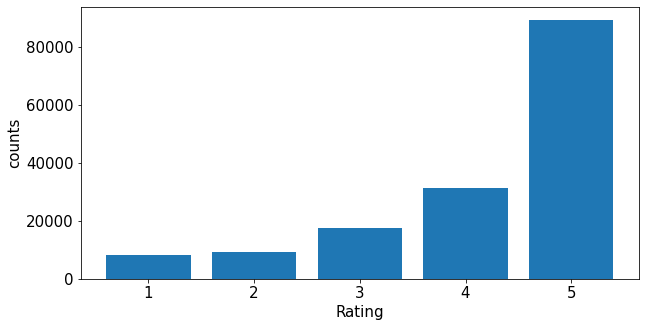

In [28]:
rtg = user_item_rating.Rating.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(rtg.index, rtg.values)
plt.xlabel('Rating')
plt.ylabel('counts')
plt.show()

In [49]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(user_item_rating, test_size=0.20)

In [50]:
print(f'Training set size: {len(train_data)}')
print(f'Testing set size: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set size: 124459
Testing set size: 31115
Test set is 20% of the full dataset.


### Map the ```Product Id``` and ```Zip Code``` fields to sequential integers for matrix processing

In [51]:
### TRAINING SET
# Get int mapping for Zip Code
u_unique_train = train_data.zip_code.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_zip2idx = {o:i for i, o in enumerate(u_unique_train)}
# Get int mapping for Product Id
b_unique_train = train_data.ProductId.unique()  # create a 'set' (i.e. all unique) list of vals
train_data_product2idx = {o:i for i, o in enumerate(b_unique_train)}

### TESTING SET
# Get int mapping for user_id
u_unique_test = test_data.zip_code.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_zip2idx = {o:i for i, o in enumerate(u_unique_test)}
# Get int mapping for unique_isbn
b_unique_test = test_data.ProductId.unique()  # create a 'set' (i.e. all unique) list of vals
test_data_product2idx = {o:i for i, o in enumerate(b_unique_test)}

In [52]:
### TRAINING SET
train_data['c_unique'] = train_data['zip_code'].map(train_data_zip2idx)
train_data['b_unique'] = train_data['ProductId'].map(train_data_product2idx)

### TESTING SET
test_data['c_unique'] = test_data['zip_code'].map(test_data_zip2idx)
test_data['b_unique'] = test_data['ProductId'].map(test_data_product2idx)

### Convert back to 3-column df
train_data = train_data[['c_unique', 'b_unique', 'Rating']]
test_data = test_data[['c_unique', 'b_unique', 'Rating']]

/home/saksham/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/saksham/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/saksham/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [53]:
train_data.tail()

,c_unique,b_unique,Rating
6714,64,1538,3
144793,70,1167,3
35107,6,32,4
20594,59,27008,5
68172,26,5635,5


In [54]:
train_data.dtypes

c_unique    int64
b_unique    int64
Rating      int64
dtype: object

This dataset is now ready to be processed via a collaborative filtering approach!

**Note:** When we need to identify the user or book from the model we'll need to refer back to the ```train_data_zip2idx``` and ```train_data_product2idx``` dictionaries to locate the ```Product Id``` and ```Zip Code```, respectively.

In [55]:
### TRAINING SET
# Create zip-product matrices
n_zip = train_data['c_unique'].nunique()
n_product = train_data['b_unique'].nunique()

# First, create an empty matrix of size USERS x BOOKS (this speeds up the later steps)
train_matrix = np.zeros((n_zip, n_product))

# Then, add the appropriate vals to the matrix by extracting them from the df with itertuples
for entry in train_data.itertuples(): # entry[1] is the user-id, entry[2] is the productId
    train_matrix[entry[1]-1, entry[2]-1] = entry[3] # -1 is to counter 0-based indexing

In [56]:
train_matrix.shape

(100, 27009)

In [57]:
### TESTING SET
# Create zip-product matrices
n_zip = test_data['c_unique'].nunique()
n_product = test_data['b_unique'].nunique()

# First, create an empty matrix of size Zip Codes x Products (this speeds up the later steps)
test_matrix = np.zeros((n_zip, n_product))

# Then, add the appropriate vals to the matrix by extracting them from the df with itertuples
for entry in test_data.itertuples(): # entry[1] is the user-id, entry[2] is the productId
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] # -1 is to counter 0-based indexing

In [58]:
test_matrix.shape

(100, 13689)

Now the matrix is in the correct format, with the city and Product Id is encoded from the mapping dict created above!

### Calculating cosine similarity with the 'pairwise distances' function

To determine the similarity between users/items we'll use the 'cosine similarity' which is a common n-dimensional distance metric.

**Note:** since all of the rating values are positive (1-10 scale), the cosine distances will all fall between 0 and 1.

In [59]:
# It may take a while to calculate, so I'll perform on a subset initially
train_matrix_small = train_matrix[:10000, :10000]
test_matrix_small = test_matrix[:10000, :10000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') # .T transposes the matrix (NumPy)

If we are looking at similarity between users we need to account for the average behaviour of that individual user. For example, one user may give all movies quite high ratings, whereas one might give all ratings between 3 and 7. These users might otherwise have quite similar preferences.

To do this, we use the users average rating as a 'weighting' factor.

If we are looking at item-based similarity we don't need to add this weighting factor.

We can incorporate this into a ```predict()``` function, like so:

In [60]:
item_similarity

array([[0.        , 0.71305812, 0.88026313, ..., 0.85493529, 1.        ,
        1.        ],
       [0.71305812, 0.        , 0.71655044, ..., 1.        , 1.        ,
        0.91509419],
       [0.88026313, 0.71655044, 0.        , ..., 0.91662595, 1.        ,
        0.8622166 ],
       ...,
       [0.85493529, 1.        , 0.91662595, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.91509419, 0.8622166 , ..., 1.        , 1.        ,
        0.        ]])

In [61]:
def predict(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [62]:
# Making predictions
item_prediction = predict(train_matrix_small, item_similarity, type='item')
user_prediction = predict(train_matrix_small, user_similarity, type='user')

### Evaluation

How do we know if this is making good ```rating``` predictions?

We'll start by just taking the root mean squared error (RMSE) (from ```sklearn```) of predicted values in the ```test_set``` (i.e. where we know what the answer should be).

Since we want to compare only predicted ratings that are in the test set, we can filter out all other predictions that aren't in the test matrix.

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return (int)(sqrt(mean_squared_error(prediction, test_matrix)))

# Call on test set to get error from each approach ('user' or 'item')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')
print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')

User-based CF RMSE: 4
Item-based CF RMSE: 4


For the user-item and the item-item recommendations we get RMSE = 4 for both. This is pretty bad, but we only trained over a small subset of the data.

Although this collaborative filtering setup is relatively simple to write, it doesn't scale very well at all, as it is all stored in memory! (Hence why we only used a subset of the training/testing data).

----------------

Instead, we should really use a model-based (based on matrix factorization) recommendation algorithm. These are inherently more scalable and can deal with higher sparsity level than memory-based models, and are considered more powerful due to their ability to pick up on "latent factors" in the relationships between what sets of items users like.

Fortunately, there is a Python library called ```surprise``` that was built specifically for the implementation of model-based recommendation systems! This library comes with many of the leading algorithms in this space already built-in. Let's try use it for our product recommender system.

# Using the ```surprise``` library for building a recommender system

In [64]:
from surprise import Reader, Dataset

In [65]:
user_item_rating.head() # take a look at our data

,ProductId,zip_code,Rating
0,1304351475,27261,5
1,535795531X,27281,3
2,5357955948,27334,5
3,6022600790,27314,4
4,7806397051,27299,4


In [66]:
# First need to create a 'Reader' object to set the scale/limit of the ratings field
reader = Reader(rating_scale=(1, 5))

# Load the data into a 'Dataset' object directly from the pandas df.
# Note: The fields must be in the order: user, item, rating
data = Dataset.load_from_df(user_item_rating, reader)
print(data)

In [67]:
# Load the models and 'evaluation' method
from surprise import SVD, NMF, model_selection, accuracy

Where: SVD = Singular Value Decomposition (orthogonal factorization), NMF = Non-negative Matrix Factorization.

## SVD Model

In [69]:
# Load SVD algorithm
model = SVD()

# Train on dataset
%time model_selection.cross_validate(model, data, measures=['MAE', 'RMSE', 'MSE'], cv=5, verbose=True)

Evaluating MAE, RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.9233  0.9278  0.9275  0.9249  0.9313  0.9270  0.0027  
RMSE (testset)    1.1866  1.1949  1.1933  1.1940  1.1999  1.1937  0.0043  
MSE (testset)     1.4081  1.4278  1.4239  1.4257  1.4398  1.4251  0.0102  
Fit time          8.53    8.30    8.24    9.10    8.22    8.48    0.33    
Test time         0.62    0.32    0.28    0.45    0.50    0.43    0.12    
CPU times: user 45.3 s, sys: 156 ms, total: 45.4 s
Wall time: 47 s


{'test_mae': array([0.92333475, 0.92781885, 0.92750314, 0.92493146, 0.93125654]),
 'test_rmse': array([1.18661699, 1.19489041, 1.19327728, 1.19403524, 1.19991846]),
 'test_mse': array([1.40805988, 1.4277631 , 1.42391067, 1.42572017, 1.43980431]),
 'fit_time': (8.532229900360107,
  8.30039644241333,
  8.235177040100098,
  9.098081588745117,
  8.21828579902649),
 'test_time': (0.6177253723144531,
  0.31723761558532715,
  0.27613210678100586,
  0.45119404792785645,
  0.49864697456359863)}

The SVD model gives an average RMSE of 1.19 after 5-folds, with a fit time of 8.48 s for each fold.

**_Using test-train split_**

In [71]:
# set test set to 20%.
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

# Instantiate the SVD model.
model = SVD()

# Train the algorithm on the training set, and predict ratings for the test set
model.fit(trainset)
predictions = model.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 1.1915


1.1914726360952896

Using a 80% train-test split, the SVD model gave a RMSE of 1.6426.

-----------

We can see that using the SVD algorithm has already far out-performed the memory-based collaborative filtering approach (RMSE of 1.19 vs 4)!

## NMF Model

In [72]:
# Load NMF algorithm
model = NMF()
# Train on books dataset
%time model_selection.cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2925  1.2974  1.3016  1.2966  1.2948  1.2966  0.0031  
Fit time          11.32   10.57   11.51   11.05   11.28   11.14   0.32    
Test time         0.47    0.28    0.23    0.48    0.22    0.33    0.11    
CPU times: user 56.6 s, sys: 188 ms, total: 56.8 s
Wall time: 59 s


{'test_rmse': array([1.29246189, 1.29741638, 1.30163878, 1.29655778, 1.29476824]),
 'fit_time': (11.317541360855103,
  10.56942868232727,
  11.510715007781982,
  11.046053409576416,
  11.275307893753052),
 'test_time': (0.46590137481689453,
  0.2778925895690918,
  0.2265634536743164,
  0.47838926315307617,
  0.22218966484069824)}

The NMF model gave a mean RMSE of 1.29, with a fit time of 11.14 s.

It seems like the SVD algorithm is the best choice for this dataset.

## Optimizing the SVD algorithm with parameter tuning
Since it seems like the SVD algorithm is our best choice, let's see if we can improve the predictions even further by optimizing some of the algorithm hyperparameters.

One way of doing this is to use the handy ```GridSearchCV``` method from the ```surprise``` library. When passed a range of hyperparameter values, ```GridSearchCV``` will automatically search through the parameter-space to find the best-performing set of hyperparameters.

In [75]:
# We'll remake the training set, keeping 20% for testing
trainset, testset = model_selection.train_test_split(data, test_size=0.2)

In [76]:
### Fine-tune Surprise SVD model useing GridSearchCV
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors': [80, 100, 120], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.01, 0.02, 0.04]}

# Optimize SVD algorithm for both root mean squared error ('rmse') and mean average error ('mae')
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

In [77]:
# Fit the gridsearch result on the entire dataset
%time gs.fit(data)

CPU times: user 10min 37s, sys: 1.41 s, total: 10min 38s
Wall time: 10min 53s


In [78]:
# Return the best version of the SVD algorithm
model = gs.best_estimator['rmse']

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.1502359457651457
{'n_factors': 80, 'lr_all': 0.001, 'reg_all': 0.04}


In [79]:
model_selection.cross_validate(model, data, measures=['rmse', 'mae'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1406  1.1530  1.1526  1.1437  1.1519  1.1484  0.0052  
MAE (testset)     0.9085  0.9148  0.9137  0.9088  0.9103  0.9112  0.0026  
Fit time          7.69    11.32   7.05    8.25    8.51    8.56    1.47    
Test time         0.48    0.31    0.29    0.46    0.30    0.37    0.09    


{'test_rmse': array([1.14063133, 1.15302836, 1.15260422, 1.14374767, 1.15187888]),
 'test_mae': array([0.90854783, 0.91480498, 0.91369131, 0.90877039, 0.91025849]),
 'fit_time': (7.686350584030151,
  11.318785429000854,
  7.051951885223389,
  8.247931480407715,
  8.512456178665161),
 'test_time': (0.4808351993560791,
  0.3123471736907959,
  0.2856924533843994,
  0.4613006114959717,
  0.2982156276702881)}

In [80]:
### Use the new parameters with the training set
model = SVD(n_factors=80, lr_all=0.005, reg_all=0.04)
model.fit(trainset) # re-fit on only the training data using the best hyperparameters
test_pred = model.test(testset)
print("SVD : Test Set")
accuracy.rmse(test_pred, verbose=True)

SVD : Test Set
RMSE: 1.1508


1.1507744877458412

Using the optimized hyperparameters we see a slight improvement in the resulting RMSE (1.15) compared with the unoptimized SVD algorithm (1.19)

## Testing some of the outputs (ratings and recommendations)
Would like to do an intuitive check of some of the recommendations being made.

Let's just choose a random Product/Zip code pair (represented in the ```suprise``` library as ```pid``` and ```zid```, respectively).

**Note:** The ```model``` being used here is the optimized SVD algorithm that has been fit on the training set.

In [86]:
# get a prediction for specific users and items.
uid = 27333  # the Zip code int
iid = 'B0000530M0' # the Product ID string
# This pair has an actual rating of 4!

pred = model.predict(uid, iid, verbose=True)

user: 27333      item: B0000530M0 r_ui = None   est = 4.18   {'was_impossible': False}


In [87]:
print(f'The estimated rating for the book with the "Product Id" code {pred.iid} from Zip Code #{pred.uid} is {pred.est:.2f}.\n')
actual_rtg = user_item_rating[(user_item_rating.zip_code==pred.uid) & (user_item_rating.ProductId==pred.iid)].Rating.values[0]
print(f'The real rating given for this was {actual_rtg:.2f}.')

The estimated rating for the book with the "Product Id" code B0000530M0 from Zip Code #27333 is 4.18.

The real rating given for this was 4.00.


In [91]:
from collections import defaultdict

#Return the top-N recommendation for each user from a set of predictions.
def get_top_n(predictions, n=10):

    # First map the predictions to each Product.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[iid].append((uid, est))

    # Then sort the predictions for each Product and retrieve the k highest ones.
    for iid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=False)
        top_n[iid] = user_ratings[:n]
        
    return top_n

In [92]:
pred = model.test(testset)
top_n = get_top_n(pred)
top_n

defaultdict(list,
            {27270: [('B000R46I1O', 2.5086585993968686),
              ('B000YZJMHS', 2.8439804076638815),
              ('B002MOBZSS', 2.936908427820765),
              ('B00GLS554Q', 3.0127094662019056),
              ('B000NLJFNY', 3.0376910644492265),
              ('B00CJIOG0Q', 3.055541396966257),
              ('B000YZLP4Q', 3.115813225239495),
              ('B00008CMOR', 3.2214627029837364),
              ('B00538TSMU', 3.290099602782652),
              ('B000F8JUJY', 3.296525656280319)],
             27333: [('B00CBD0M8Y', 2.96477611973151),
              ('B005C48WB8', 3.1955123625409785),
              ('B004IC8WS8', 3.2380277234741706),
              ('B006WVCF18', 3.3992959092980266),
              ('B00AXRBAEA', 3.411337642050393),
              ('B003BJZ1M4', 3.414861664906444),
              ('B003NV9R2U', 3.4168952713021614),
              ('B00871KNRY', 3.545287401851097),
              ('B009HKAWFC', 3.568935045881169),
              ('B000O9O4YU',

In [93]:
# Just take a random look at zip code = 27238
top_n[27239]

[('B00HM6IVXI', 2.8525079143770995),
 ('B00CTKKE7I', 3.1115745137373256),
 ('B000YZJMHS', 3.1495966012435668),
 ('B000YZJMHS', 3.1495966012435668),
 ('B00AE07CT8', 3.186259783805397),
 ('B005UBN2AO', 3.2939495988426932),
 ('B000JNRIM6', 3.3387664542146274),
 ('B002MOBZSS', 3.37358116455487),
 ('B00GLS58SO', 3.408750509158517),
 ('B001Q878WI', 3.4633032140615114)]